In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import requests
from bs4 import BeautifulSoup as bs
import time
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [57]:
url = 'https://flight.naver.com/'
driver = webdriver.Chrome('./chromedriver.exe')
driver.get(url)
time.sleep(2)
driver.maximize_window()

# 편도 클릭
driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div[4]/div/div/div[1]/button[2]/i').click()
time.sleep(1)

# 출발지 클릭
driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div[4]/div/div/div[2]/div[1]/button[1]').click()
time.sleep(1)

# 서울 입력
driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div[9]/div[1]/div/input').send_keys('서울')
time.sleep(1)

# 서울 선택
driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div[9]/div[2]/section/div/a[1]').click()
time.sleep(1)

# 도착지 클릭
driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div[4]/div/div/div[2]/div[1]/button[2]').click()
time.sleep(1)

# 제주 입력
driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div[9]/div[1]/div/input').send_keys('제주')
time.sleep(1)

# 제주 선택
driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div[9]/div[2]/section/div/a[1]').click()
time.sleep(1)

# 가는날 클릭 (내일로 8월 12일)
driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div[4]/div/div/div[2]/div[2]/button').click()
time.sleep(1)

# 월 선택
months = driver.find_elements(By.CLASS_NAME, 'month')
# print(len(months))

# 일 선택
days = months[0].find_elements(By.CLASS_NAME, 'num')
# print(len(days))
# print(days[14].text)
days[11].click()

# 항공권 검색 클릭
driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div[4]/div/div/button').click()
time.sleep(10)

for i in range(10):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);") #자바스크립트 함수
    time.sleep(2) #로딩중..

html = driver.page_source
driver.close()
driver.quit()

C:\Users\user\AppData\Local\Temp\ipykernel_14160\25003852.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver.exe')


'<html><head><meta charset="utf-8"><meta http-equiv="x-ua-compatible" content="ie=edge"><title>네이버 항공권</title><meta name="description" content="설레는 여행의 시작. 네이버 항공권과 함께!"><meta property="og:title" content="네이버 항공권"><meta property="og:description" content="설레는 여행의 시작. 네이버 항공권과 함께!"><meta property="og:type" content="article"><meta property="og:article:author" content="네이버 항공권"><meta property="og:site_name" content="네이버 항공권"><meta property="og:image" content="https://m-flight.naver.com/images/og_image.png"><meta property="og:url" content="https://m-flight.naver.com"><meta property="twitter:card" content="summary_large_image"><meta property="twitter:title" content="네이버 항공권"><meta property="twitter:description" content="설레는 여행의 시작. 네이버 항공권과 함께!"><meta property="twitter:site" content="네이버 항공권"><meta property="twitter:image" content="https://m-flight.naver.com/images/og_image.png"><meta property="og:article:author" content="네이버 항공권"><meta name="viewport" content="width=device-width,initial-sca
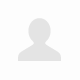
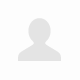

In [32]:
html

In [33]:
soup = bs(html, 'html.parser')

In [17]:
div_tags = soup.find_all('div', 'domestic_inner__15-bD')

In [18]:
div_tags[0]

<div class="domestic_inner__15-bD"><div class="layout_large__2AaMz"><div class="searchCondition_searchbox__1Df9W"><div class="inner"><div class="searchBox_searchBox__1vmcr in_list"><div class="searchBox_tablist__1uWMk" role="tablist"><button aria-disabled="false" aria-selected="false" class="searchBox_tab__cPM55 searchBox_Tab__39-OR" role="tab" type="button"><i class="searchBox_text__nUcMZ">왕복</i></button><button aria-disabled="false" aria-selected="true" class="searchBox_tab__cPM55 searchBox_Tab__39-OR" role="tab" type="button"><i class="searchBox_text__nUcMZ">편도</i></button><button aria-disabled="false" aria-selected="false" class="searchBox_tab__cPM55 searchBox_Tab__39-OR" role="tab" type="button"><i class="searchBox_text__nUcMZ">다구간</i></button></div><div class="searchBox_tabpanel__1BSGR" data-itinerary="1" data-triptype="OW" role="tabpanel"><div class="tabContent_routes__laamB"><button aria-disabled="false" aria-selected="false" class="tabContent_route__1GI8F select_City__2NOOZ st

In [78]:
soup=bs(html,'html.parser')
flights=soup.find_all('div','domestic_Flight__sK0eA result')

res=[]
for idx,flight in enumerate(flights):
    airline=flight.find('div','airline').text
    # time=flight[0].find_all('span','route_airport__3VT7M')
    depart_time=flight.find_all('span','route_airport__3VT7M')[0].find('b','route_time__-2Z1T').text
    arrival_time=flight.find_all('span','route_airport__3VT7M')[1].find('b','route_time__-2Z1T').text
    taken_time = flight.find('div', 'route_Route__2UInh').find('i', 'route_info__1RhUH').text
    fee = flight.find('i', 'domestic_num__2roTW').text
    card = flight.select('div.domestic_prices__3N88F div i')
    for i in card:
        if '카드' in i.text:
            card = i.text.split(' ')[0]
            break
        else:
            card = '없음'
    print(idx, card)
    # print(card)
    
    tmp={
        '항공사':airline,
        '출발시간':depart_time,
        '도착시간':arrival_time,
        '소요시간': taken_time,
        '가격': fee,
        '카드사': card
    }
    
    res.append(tmp)

0 KB국민카드
1 삼성카드
2 삼성카드
3 삼성카드
4 삼성카드
5 삼성카드
6 삼성카드
7 삼성카드
8 삼성카드
9 삼성카드
10 삼성카드
11 삼성카드
12 삼성카드
13 삼성카드
14 삼성카드
15 삼성카드
16 삼성카드
17 삼성카드
18 삼성카드
19 삼성카드
20 삼성카드
21 삼성카드
22 삼성카드
23 삼성카드
24 삼성카드
25 삼성카드
26 삼성카드
27 삼성카드
28 삼성카드
29 삼성카드
30 삼성카드
31 롯데카드
32 없음
33 삼성카드
34 삼성카드
35 삼성카드
36 삼성카드
37 삼성카드
38 삼성카드
39 삼성카드
40 삼성카드
41 삼성카드
42 삼성카드
43 롯데카드
44 삼성카드
45 삼성카드
46 삼성카드
47 삼성카드
48 삼성카드
49 삼성카드
50 삼성카드
51 롯데카드
52 삼성카드
53 삼성카드
54 삼성카드
55 삼성카드
56 삼성카드
57 삼성카드
58 삼성카드
59 삼성카드
60 삼성카드
61 삼성카드
62 삼성카드
63 삼성카드
64 삼성카드
65 삼성카드
66 삼성카드
67 삼성카드
68 삼성카드
69 삼성카드
70 삼성카드
71 삼성카드
72 삼성카드
73 삼성카드
74 삼성카드
75 삼성카드
76 삼성카드
77 삼성카드
78 삼성카드
79 삼성카드
80 삼성카드
81 삼성카드
82 삼성카드
83 삼성카드
84 삼성카드
85 삼성카드
86 삼성카드
87 삼성카드
88 삼성카드
89 롯데카드
90 삼성카드
91 삼성카드
92 삼성카드
93 삼성카드
94 삼성카드
95 삼성카드
96 KB국민카드
97 삼성카드
98 삼성카드
99 삼성카드
100 삼성카드
101 롯데카드
102 삼성카드
103 삼성카드
104 삼성카드
105 삼성카드
106 삼성카드
107 삼성카드
108 삼성카드
109 삼성카드
110 삼성카드
111 삼성카드
112 삼성카드
113 삼성카드
114 삼성카드
115 삼성카드
116 삼성카드
117 삼성카드
118 삼성카드
119 삼성카드
120 삼성카드
121 삼성카드
122 삼성카드
1

In [79]:
df=pd.DataFrame(res)

In [80]:
display(df)

,항공사,출발시간,도착시간,소요시간,가격,카드사
0,에어서울,06:00,07:00,01시간 00분,"108,900",KB국민카드
1,에어서울,06:00,07:00,01시간 00분,"134,000",삼성카드
2,아시아나항공,06:05,07:15,01시간 10분,"117,000",삼성카드
3,아시아나항공,06:05,07:15,01시간 10분,"147,000",삼성카드
4,아시아나항공,06:05,07:15,01시간 10분,"184,000",삼성카드
...,...,...,...,...,...,...
150,아시아나항공,18:45,19:55,01시간 10분,"204,000",삼성카드
151,에어부산,18:50,19:55,01시간 05분,"133,000",롯데카드
152,대한항공,18:55,20:10,01시간 15분,"144,000",삼성카드
153,대한항공,19:20,20:30,01시간 10분,"204,000",삼성카드


In [84]:
len(flights)

155

In [70]:
card

[<i class="domestic_type__30RSq">할인석</i>,
 <i class="domestic_num__2roTW">108,900</i>,
 <i class="domestic_type__30RSq">KB국민카드 결제시 3% 청구할인</i>,
 <i class="domestic_num__2roTW">105,670</i>]

In [71]:
for i in card:
    print(i.text)

할인석
108,900
KB국민카드 결제시 3% 청구할인
105,670


In [74]:
for i in card:
    if '카드' in i.text:
        print(i.text.split(' ')[0])

KB국민카드


In [83]:
flights

[<div class="domestic_Flight__sK0eA result"><div class="domestic_inner__15-bD"><div class="domestic_schedule__1Whiq"><div class="domestic_item__2B--k"><div class="heading"><div class="airline"><div class="logos"><img alt="에어서울" class="logo" src="https://vertical.pstatic.net/vertical/static/flight/airlines/RS.png"/></div><b class="name">에어서울</b></div><div class="info"></div></div><div class="route_Route__2UInh"><span class="route_airport__3VT7M"><b class="route_time__-2Z1T">06:00</b><i class="route_code__3WUFO">GMP</i></span><span class="route_airport__3VT7M"><b class="route_time__-2Z1T">07:00</b><i class="route_code__3WUFO">CJU</i></span><i class="route_info__1RhUH">01시간 00분</i></div></div></div><button class="domestic_select_schedule__xWQ-K" type="button"></button><div class="domestic_prices__3N88F"><div class="domestic_item__2B--k"><i class="domestic_type__30RSq">할인석</i><b class="domestic_price__1qAgw"><span class="domestic_txt__2YFi_">편도 </span><i class="domestic_num__2roTW">108,900